# Renda Familiar x Nota Redação — Enem 2021/Parte 03

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
microdadosEnem = pd.read_csv("microdados_enem_2021/DADOS/MICRODADOS_ENEM_2021.csv", sep=";", encoding='ISO_8859_1')

In [3]:
microdadosEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

# SELECIONAMOS APENAS AS COLUNAS QUE NOS INTERESSA

In [145]:
colunas=['NU_INSCRICAO','NU_NOTA_REDACAO', 'Q006', 'SG_UF_ESC', 'NO_MUNICIPIO_ESC']

CRIAMOS UM DATAFRAME COM AS COLUNAS SELECIONADAS DF1, E DEPOIS UM MENOR COM MENOS COLUNAS DF2. 

In [146]:
df=microdadosEnem.filter(items=colunas).dropna()
df

,NU_INSCRICAO,NU_NOTA_REDACAO,Q006,SG_UF_ESC,NO_MUNICIPIO_ESC
3,210052128335,780.0,B,CE,Crato
4,210051353021,780.0,C,CE,Redenção
33,210053085526,700.0,B,BA,Urandi
45,210052916275,640.0,C,ES,Montanha
51,210051417174,680.0,D,ES,São Mateus
...,...,...,...,...,...
3389073,210051724712,540.0,B,BA,Juazeiro
3389248,210051125662,420.0,C,SP,São Paulo
3389288,210052134860,580.0,A,BA,Canarana
3389422,210054211916,680.0,B,BA,Salvador


<b>Q001: Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)?<br>


DEFINIR UM DICIONÁRIO COM AS RESPOSTAS COMPLETAS <BR>
    {x:xx, z:zz...}

## CRIAR NOVAS COLUNAS NO DATASET

In [147]:
dic_q006={'A': 'Nenhuma renda', 'B':'Até 1.100,00 reais',
               'C':'De 1.100,01 até 1.650,00 reais',
               'D':'De 1.650,01 até 2.200,00 reais',
               'E':'De 2.200,01 até 2.750,00 reais',
               'F':'De 2.750,01 até 3.300,00 reais',
               'G':'De 3.300,01 até 4.400,00 reais',
               'H':'De 4.400,01 até 5.500,00 reais',
               'I':'De 5.500,01 até 6.600,00 reais',
               'J':'De 6.600,01 até 7.700,00 reais',
               'K':'De 7.700,01 até 8.800,00 reais',
               'L':'De 8.800,01 até 9.900,00 reais',
               'M':'De 9.900,01 até 11.000,00 reais',
               'N':'De 11.000,01 até 13.200,00 reais',
               'O':'De 13.200,01 até 16.500,00 reais',
               'P':'De 16.500,01 até 22.000,00 reais',
               'Q':'Acima de 22.000,00 reais'}

'NOME_Q001 é o nome da minha nova coluna <BR>
 Ao abrir [] estamos pedindo que a informação dentro deles gere uma lista, e esta lista será atribuída a RESP <br>
Neste caso, para cada elemento da DF2.'Q001' queremos a resposta correspondente do dicionário

In [148]:
df['RENDA']=[dic_q006[resp] for resp in df.Q006]

In [149]:
df.head()

,NU_INSCRICAO,NU_NOTA_REDACAO,Q006,SG_UF_ESC,NO_MUNICIPIO_ESC,RENDA
3,210052128335,780.0,B,CE,Crato,"Até 1.100,00 reais"
4,210051353021,780.0,C,CE,Redenção,"De 1.100,01 até 1.650,00 reais"
33,210053085526,700.0,B,BA,Urandi,"Até 1.100,00 reais"
45,210052916275,640.0,C,ES,Montanha,"De 1.100,01 até 1.650,00 reais"
51,210051417174,680.0,D,ES,São Mateus,"De 1.650,01 até 2.200,00 reais"


### Vamos comparar a distribuição renda dos candidatos

In [181]:
df_br = df.filter(items= ['NU_INSCRICAO', 'RENDA']).groupby('RENDA').count().sort_values(by='NU_INSCRICAO', ascending=False)


In [182]:
df_br

,NU_INSCRICAO
RENDA,
"Até 1.100,00 reais",137440
"De 1.100,01 até 1.650,00 reais",85714
"De 1.650,01 até 2.200,00 reais",74138
"De 2.750,01 até 3.300,00 reais",50906
"De 3.300,01 até 4.400,00 reais",46731
"De 2.200,01 até 2.750,00 reais",42342
"De 4.400,01 até 5.500,00 reais",39222
Nenhuma renda,26218
"De 5.500,01 até 6.600,00 reais",25039


<H4 style="color:black">Agora vamos olhar para a média da redação de acordo com a renda familiar </div>

In [151]:
renda=df.filter(items= ['NU_NOTA_REDACAO', 'RENDA']).groupby('RENDA').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

In [152]:
renda.head()

,NU_NOTA_REDACAO
RENDA,
"Acima de 22.000,00 reais",772.726095
"De 16.500,01 até 22.000,00 reais",762.028031
"De 13.200,01 até 16.500,00 reais",748.444218
"De 11.000,01 até 13.200,00 reais",738.658690
"De 9.900,01 até 11.000,00 reais",728.994978


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(-2.0, 0, 'Até 1.100,00 reais'),
  Text(0.0, 0, 'Acima de 22.000,00 reais'),
  Text(2.0, 0, 'De 13.200,01 até 16.500,00 reais'),
  Text(4.0, 0, 'De 9.900,01 até 11.000,00 reais'),
  Text(6.0, 0, 'De 7.700,01 até 8.800,00 reais'),
  Text(8.0, 0, 'De 5.500,01 até 6.600,00 reais'),
  Text(10.0, 0, 'De 3.300,01 até 4.400,00 reais'),
  Text(12.0, 0, 'De 2.200,01 até 2.750,00 reais'),
  Text(14.0, 0, 'De 1.100,01 até 1.650,00 reais'),
  Text(16.0, 0, 'Nenhuma renda'),
  Text(18.0, 0, '')])

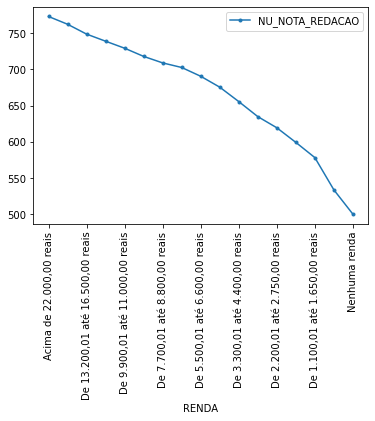

In [177]:
renda.plot(marker='.')
plt.xticks(rotation=90)

<H5 style="color:green">Percebemos que existe uma correlação entre a média da redação dos candidatos e a renda familiar. Quanto maior a renda, maior a nota da redação</div>

# SERÁ QUE A TENDÊNCIA SE MANTÉM EM TODOS OS ESTADOS?

# RENDA DOS CANDIDATOS NO ESTADO DO ES

In [183]:
df_es=df.filter(items= ['NU_INSCRICAO', 'RENDA']).where(df.SG_UF_ESC=='ES').groupby('RENDA').count().sort_values(by='NU_INSCRICAO', ascending=False)


In [184]:
df_es

,NU_INSCRICAO
RENDA,
"De 1.100,01 até 1.650,00 reais",2540
"Até 1.100,00 reais",2444
"De 1.650,01 até 2.200,00 reais",2117
"De 2.750,01 até 3.300,00 reais",1358
"De 2.200,01 até 2.750,00 reais",1236
"De 3.300,01 até 4.400,00 reais",1132
"De 4.400,01 até 5.500,00 reais",867
"De 5.500,01 até 6.600,00 reais",594
"De 9.900,01 até 11.000,00 reais",348


# RENDA DOS CANDIDATOS NO MUNCÍPIO DE DOMINGOS MARTINS

In [185]:
df_dm=df.filter(items= ['NU_INSCRICAO', 'RENDA']).where(df.NO_MUNICIPIO_ESC=='Domingos Martins').groupby('RENDA').count().sort_values(by='NU_INSCRICAO', ascending=False)


In [186]:
df_dm

,NU_INSCRICAO
RENDA,
"De 1.100,01 até 1.650,00 reais",51
"Até 1.100,00 reais",40
"De 1.650,01 até 2.200,00 reais",29
"De 3.300,01 até 4.400,00 reais",15
"De 2.750,01 até 3.300,00 reais",11
"De 2.200,01 até 2.750,00 reais",9
"De 4.400,01 até 5.500,00 reais",9
"De 6.600,01 até 7.700,00 reais",5
"De 5.500,01 até 6.600,00 reais",4


### GROUP BY PARA MOSTRAR A NOTA DA REDAÇÃO CONFORME RENDA EM CADA ESTADO

In [158]:
df.filter(items=['SG_UF_ESC','NU_NOTA_REDACAO','RENDA'])\
.groupby(['SG_UF_ESC', 'RENDA'])\
.mean()

NU_NOTA_REDACAO
SG_UF_ESC RENDA                                            
AC        Acima de 22.000,00 reais               695.789474
          Até 1.100,00 reais                     519.920635
          De 1.100,01 até 1.650,00 reais         570.613333
          De 1.650,01 até 2.200,00 reais         586.766917
          De 11.000,01 até 13.200,00 reais       690.322581
...                                                     ...
TO        De 6.600,01 até 7.700,00 reais         680.930233
          De 7.700,01 até 8.800,00 reais         678.383838
          De 8.800,01 até 9.900,00 reais         687.916667
          De 9.900,01 até 11.000,00 reais        738.775510
          Nenhuma renda                          467.821782

[459 rows x 1 columns]

## DESENVOLVIMENTO DOS DETALHES DO GRÁFICOS NO MATPLOTLIB

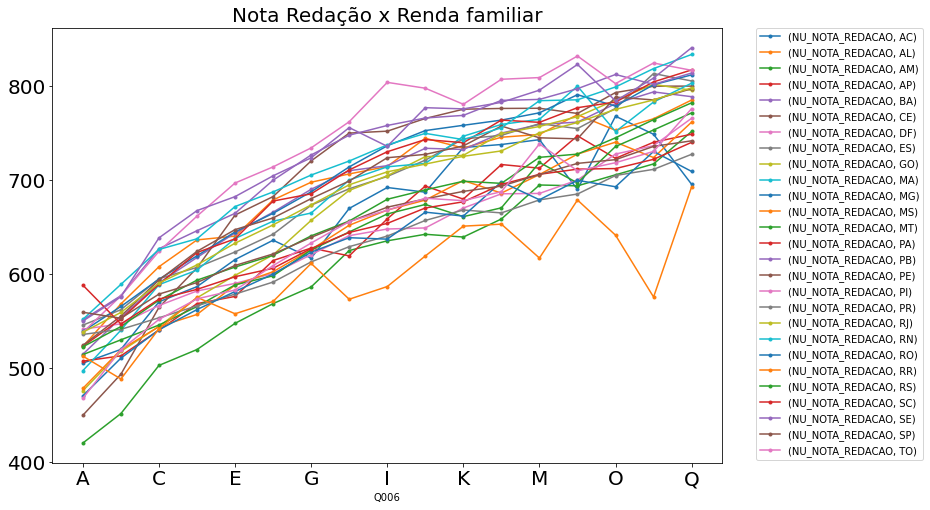

In [159]:
#fig, ax=plt.subplots(figsize=(15,10))
#plt.xticks(rotation=90)
#plt.suptitle('Nota Redação x Escolaridade Mãe x Estado')

ax=df.filter(items=['SG_UF_ESC','NU_NOTA_REDACAO','Q006'])\
.groupby(['Q006','SG_UF_ESC', ])\
.mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
.unstack().plot(figsize=(12,8), fontsize=20, marker='.') #colormap='plasma' poderia alterar as cores das linhas do plot

#UNSTACK = DESIMPILHAR, OU SEJA, SEPARAR POR GRUPOS DE ESTADO

ax.set_title('Nota Redação x Renda familiar', fontsize=20)
ax.legend(bbox_to_anchor=(1.05,1), loc=0, borderaxespad=0) 

#Classe axes
#método legend para mexer na legenda, bbox_to_anchor usa a referencia de localização dentro do grafico 
#de 0.0 (começo da linha) ate 1.1(final da linha), sendo 0,5 no meio do gráfico
#Usando o 1.05 a caixa de legenda sai da area do plot e vai um pouco para o lado
#loc=0 posiciona a localização da caixa de legenda
# o borderaxespad altera a altura da caixa de legenda em relação ao plot


UNSTACK = DESIMPILHAR, OU SEJA, SEPARAR POR GRUPOS DE ESTADO

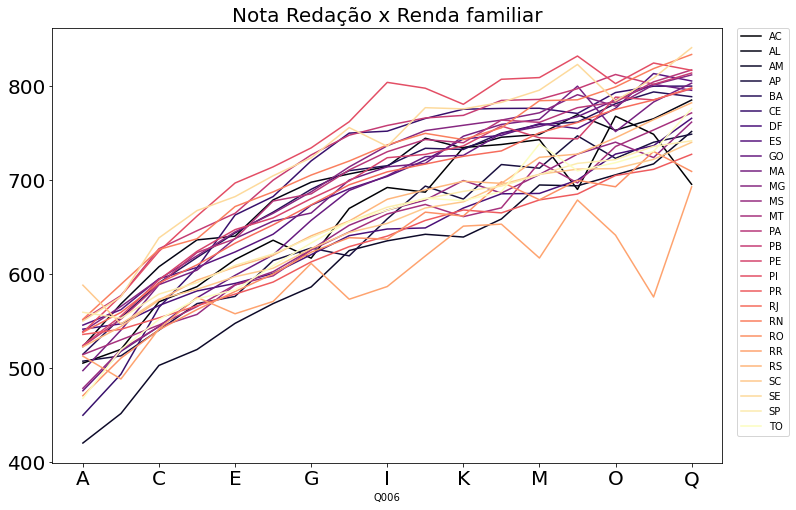

In [187]:
#Classe axes
#método legend para mexer na legenda, bbox_to_anchor usa a referencia de localização dentro do grafico 
#de 0.0 (começo da linha) ate 1.1(final da linha), sendo 0,5 no meio do gráfico
#Usando o 1.05 a caixa de legenda sai da area do plot e vai um pouco para o lado
#loc=0 posiciona a localização da caixa de legenda
# o borderaxespad altera a altura da caixa de legenda em relação ao plot

ax=df.filter(items=['SG_UF_ESC','NU_NOTA_REDACAO','Q006'])\
.groupby(['Q006','SG_UF_ESC', ])\
.mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
.unstack().plot(figsize=(12,8), fontsize=20, colormap='magma') 

ax.set_title('Nota Redação x Renda familiar', fontsize=20)
ax.legend(bbox_to_anchor=(1.05,1), loc=0, borderaxespad=0) 


handles, labels = ax.get_legend_handles_labels()

import re
edited_labels = [re.search(',\s(.+?)\)', label).group(1) for label in labels]
ax.legend(edited_labels, bbox_to_anchor=(1.1,1), loc=0, borderaxespad=0) 


#ax.get_legend_handles_labels() método do ax. para alterar as legendas
# re= regular expressions, para identificar padrões em palavras e extraír só as palavras que queremos na legenda
# re.search(',\s(.+?)\)' = oque ele deve procurar, neste caso, a vírgula, o espaço (\s)
# pegue tudo (.+?) que for encontrado entre() para cada elemento da lista de labels (legendas)

Text(0.05, 0.65, 'A : Nenhuma renda\nB : Até 1.100,00 reais\nC : De 1.100,01 até 1.650,00 reais\nD : De 1.650,01 até 2.200,00 reais\nE : De 2.200,01 até 2.750,00 reais\nF : De 2.750,01 até 3.300,00 reais\nG : De 3.300,01 até 4.400,00 reais\nH : De 4.400,01 até 5.500,00 reais\nI : De 5.500,01 até 6.600,00 reais\nJ : De 6.600,01 até 7.700,00 reais\nK : De 7.700,01 até 8.800,00 reais\nL : De 8.800,01 até 9.900,00 reais\nM : De 9.900,01 até 11.000,00 reais\nN : De 11.000,01 até 13.200,00 reais\nO : De 13.200,01 até 16.500,00 reais\nP : De 16.500,01 até 22.000,00 reais\nQ : Acima de 22.000,00 reais\n')

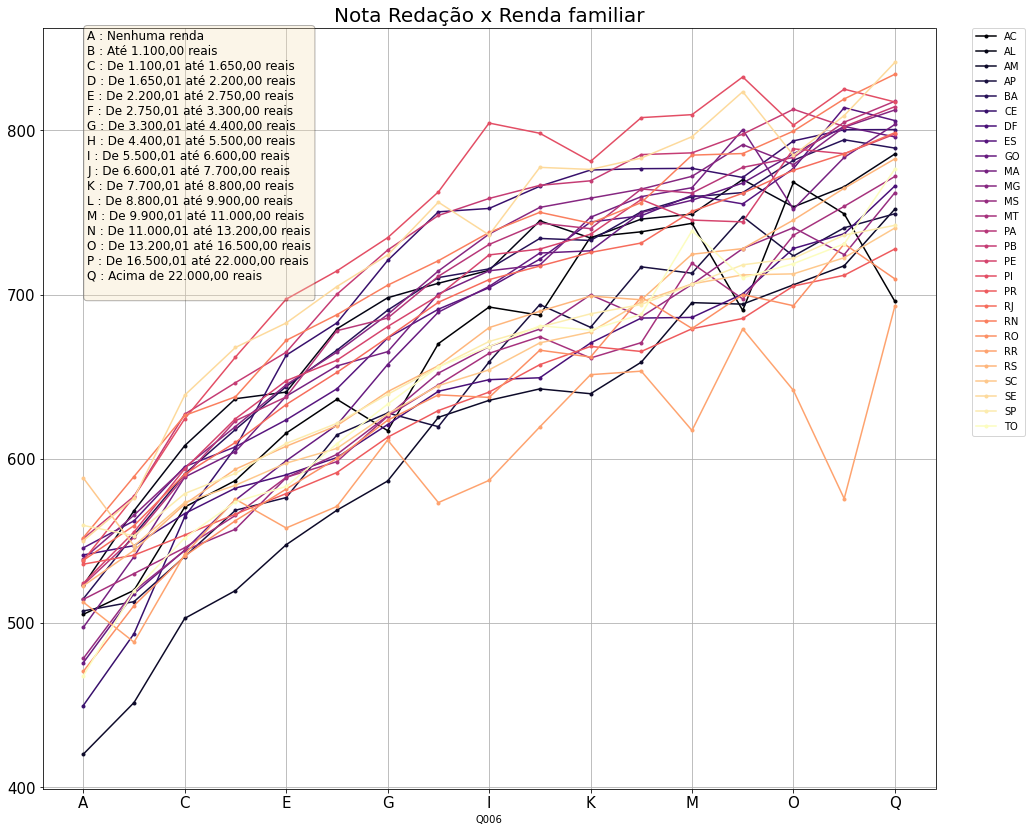

In [188]:
#ax = Classe axes

ax=df.filter(items=['SG_UF_ESC','NU_NOTA_REDACAO','Q006'])\
.groupby(['Q006','SG_UF_ESC', ])\
.mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
.unstack().plot(figsize=(16,14), fontsize=15, grid=True, marker='.', colormap = 'magma') 
#UNSTACK = DESIMPILHAR, OU SEJA, SEPARAR POR GRUPOS DE ESTADO

ax.set_title('Nota Redação x Renda familiar', fontsize=20)
ax.legend(bbox_to_anchor=(1.05,1), loc=0, borderaxespad=0)

#método ax.legend() para mexer na legenda, 
#bbox_to_anchor usa a referencia de localização dentro do grafico 
#loc=0 posiciona a localização da caixa de legenda
# borderaxespad altera a altura da caixa de legenda em relação ao plot

handles, labels = ax.get_legend_handles_labels()

import re
edited_labels = [re.search(',\s(.+?)\)', label).group(1) for label in labels]
ax.legend(edited_labels, bbox_to_anchor=(1.1,1), loc=0, borderaxespad=0) 

#ax.get_legend_handles_labels() método do ax. para alterar as legendas
# re= regular expressions, para identificar padrões em palavras e extraír só as palavras que queremos na legenda
# re.search(',\s(.+?)\)' = oque ele deve procurar, neste caso, a vírgula, o espaço (\s)
# pegue tudo (.+?) que for encontrado entre() para cada elemento da lista de labels (legendas)

dic_Q006 = "" #string vazia

for key,value in dic_q006.items(): 
    dic_Q006 = dic_Q006 + "{k} : {v}\n".format(k=key, v=value) 

#para cada key e value do dicionario dic_q001eq002.items() o .items() é a versão iteravel do dicionário que permite o for
#adicionar a string vazia as chaves e valores do dicionário .format() é oq perite formatar a string e p \n é o espaço


ax.text(0.05,0.65, dic_Q006, transform=ax.transAxes, fontsize=12, 
        bbox={'boxstyle':'round', 'facecolor': 'wheat', 'alpha':0.3})

#ax.text aqui eu jogo a string criada como atributo de texto do ax
# os números são a posição que quero essa string
# bbox com as configurações da caixa da string, alpha é a transparência da caixa


In [162]:
df

,NU_INSCRICAO,NU_NOTA_REDACAO,Q006,SG_UF_ESC,NO_MUNICIPIO_ESC,RENDA
3,210052128335,780.0,B,CE,Crato,"Até 1.100,00 reais"
4,210051353021,780.0,C,CE,Redenção,"De 1.100,01 até 1.650,00 reais"
33,210053085526,700.0,B,BA,Urandi,"Até 1.100,00 reais"
45,210052916275,640.0,C,ES,Montanha,"De 1.100,01 até 1.650,00 reais"
51,210051417174,680.0,D,ES,São Mateus,"De 1.650,01 até 2.200,00 reais"
...,...,...,...,...,...,...
3389073,210051724712,540.0,B,BA,Juazeiro,"Até 1.100,00 reais"
3389248,210051125662,420.0,C,SP,São Paulo,"De 1.100,01 até 1.650,00 reais"
3389288,210052134860,580.0,A,BA,Canarana,Nenhuma renda
3389422,210054211916,680.0,B,BA,Salvador,"Até 1.100,00 reais"


# CRIAR NOVA COLUNA COM AS REGIÕES

In [163]:
dic_regioes={'AM': 'Norte', 'RR':'Norte','AP':'Norte','PA':'Norte','TO':'Norte','RO':'Norte','AC':'Norte',
               'MA':'Nordeste','PI':'Nordeste','CE':'Nordeste','RN':'Nordeste','PE':'Nordeste','PB':'Nordeste','SE':'Nordeste',
               'AL':'Nordeste','BA':'Nordeste',
               'MT':'Centro-Oeste', 'MS':'Centro-Oeste', 'GO':'Centro-Oeste', 'DF':'Centro_Oeste', 
               'SP':'Sudeste', 'RJ':'Sudeste', 'ES':'Sudeste','MG':'Sudeste',
               'PR':'Sul', 'RS':'Sul','SC':'Sul' }

In [164]:
df['REGIAO']=[dic_regioes[resp] for resp in df.SG_UF_ESC]

In [165]:
df

,NU_INSCRICAO,NU_NOTA_REDACAO,Q006,SG_UF_ESC,NO_MUNICIPIO_ESC,RENDA,REGIAO
3,210052128335,780.0,B,CE,Crato,"Até 1.100,00 reais",Nordeste
4,210051353021,780.0,C,CE,Redenção,"De 1.100,01 até 1.650,00 reais",Nordeste
33,210053085526,700.0,B,BA,Urandi,"Até 1.100,00 reais",Nordeste
45,210052916275,640.0,C,ES,Montanha,"De 1.100,01 até 1.650,00 reais",Sudeste
51,210051417174,680.0,D,ES,São Mateus,"De 1.650,01 até 2.200,00 reais",Sudeste
...,...,...,...,...,...,...,...
3389073,210051724712,540.0,B,BA,Juazeiro,"Até 1.100,00 reais",Nordeste
3389248,210051125662,420.0,C,SP,São Paulo,"De 1.100,01 até 1.650,00 reais",Sudeste
3389288,210052134860,580.0,A,BA,Canarana,Nenhuma renda,Nordeste
3389422,210054211916,680.0,B,BA,Salvador,"Até 1.100,00 reais",Nordeste


Text(1.1, 0, 'A : Nenhuma renda\nB : Até 1.100,00 reais\nC : De 1.100,01 até 1.650,00 reais\nD : De 1.650,01 até 2.200,00 reais\nE : De 2.200,01 até 2.750,00 reais\nF : De 2.750,01 até 3.300,00 reais\nG : De 3.300,01 até 4.400,00 reais\nH : De 4.400,01 até 5.500,00 reais\nI : De 5.500,01 até 6.600,00 reais\nJ : De 6.600,01 até 7.700,00 reais\nK : De 7.700,01 até 8.800,00 reais\nL : De 8.800,01 até 9.900,00 reais\nM : De 9.900,01 até 11.000,00 reais\nN : De 11.000,01 até 13.200,00 reais\nO : De 13.200,01 até 16.500,00 reais\nP : De 16.500,01 até 22.000,00 reais\nQ : Acima de 22.000,00 reais\n')

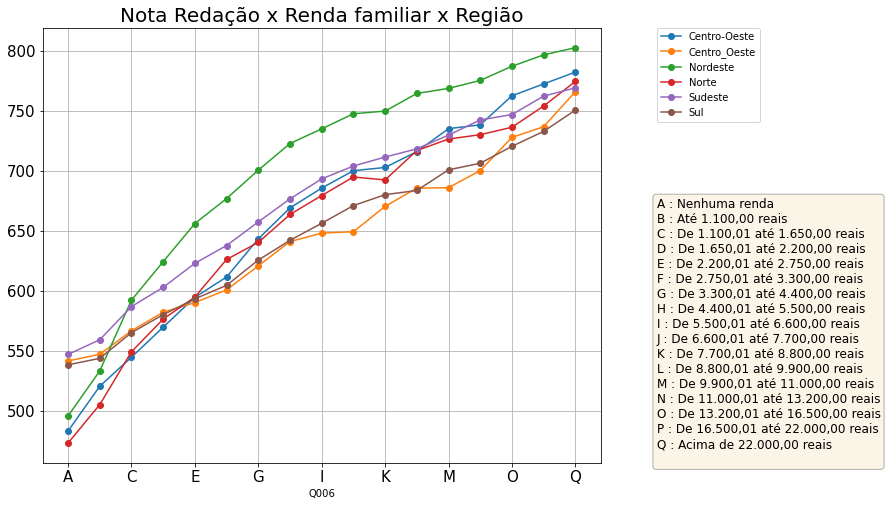

In [166]:
ax=df.filter(items=['REGIAO','NU_NOTA_REDACAO','Q006'])\
.groupby(['Q006','REGIAO', ])\
.mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
.unstack().plot(figsize=(10,8), fontsize=15, grid=True, marker='o') 

ax.set_title('Nota Redação x Renda familiar x Região', fontsize=20)
ax.legend(bbox_to_anchor=(1.05,1), loc=0, borderaxespad=0) 


handles, labels = ax.get_legend_handles_labels()

import re
edited_labels = [re.search(',\s(.+?)\)', label).group(1) for label in labels]
ax.legend(edited_labels, bbox_to_anchor=(1.1,1), loc=0, borderaxespad=0) 

dic_Q006 = "" #string vazia

for key,value in dic_q006.items(): 
    dic_Q006 = dic_Q006 + "{k} : {v}\n".format(k=key, v=value) 

#para cada key e value do dicionario dic_q001eq002.items() o .items() é a versão iteravel do dicionário que permite o for
#adicionar a string vazia as chaves e valores do dicionário .format() é oq perite formatar a string e p \n é o espaço


ax.text(1.1,0, dic_Q006, transform=ax.transAxes, fontsize=12, 
        bbox={'boxstyle':'round', 'facecolor': 'wheat', 'alpha':0.3})

#ax.text aqui eu jogo a string criada como atributo de texto do ax
# os números são a posição que quero essa string
# bbox com as configurações da caixa da string, alpha é a transparência da caixa
